In [1]:
cd /home/karen/Documents/GitHub/Muscle_wasting

/home/karen/Documents/GitHub/Muscle_wasting


/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import mirna_scoring.walking_network as wn
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mirna_scoring.mirna_impact as mis
import seaborn as sns
import mirna_scoring.mirna_influence_plots as mi_plot

In [46]:
import mirna_scoring.jupyter_functions as jf

This notebook is a walk though for a network scoring

First, we need the network, output from the miRKat Network.

In [3]:
network = nx.read_gpickle(f"network/Networks_pkl/complete_n_tf_mirnas__Sarcopenia_relevant_plus_cutoff_0.9.pkl")

In [4]:
my_network = mis.mirna_network(network=network)

This network has all the miRs, pathways, dds, etc. We can get, for example, the mirnas

In [5]:
my_network.get_mirna_nodes()[:2]

['hsa-miR-21-5p', 'hsa-miR-16-5p']

We can see what are the combinations that the network has

In [6]:
my_network.get_all_available_combinations()

['yo_file',
 'ym_file',
 'mo_file',
 'yo_F_file',
 'yo_M_file',
 'ym_F_file',
 'ym_M_file',
 'mo_F_file',
 'mo_M_file',
 'mf_y_file',
 'mf_m_file',
 'mf_o_file']

we can see the frequency pathways on the network

In [7]:
my_network.frequency_pathways

{'GOBP_FAT_SOLUBLE_VITAMIN_CATABOLIC_PROCESS': 1,
 'GOBP_VITAMIN_CATABOLIC_PROCESS': 1,
 'GOMF_ESTROGEN_16_ALPHA_HYDROXYLASE_ACTIVITY': 1,
 'GOBP_PROTON_MOTIVE_FORCE_DRIVEN_ATP_SYNTHESIS': 1,
 'GOCC_PROTON_TRANSPORTING_ATP_SYNTHASE_COMPLEX': 1,
 'GOCC_PROTON_TRANSPORTING_ATP_SYNTHASE_COMPLEX_COUPLING_FACTOR_F_O': 1,
 'GOCC_PROTON_TRANSPORTING_TWO_SECTOR_ATPASE_COMPLEX': 1,
 'GOCC_PROTON_TRANSPORTING_TWO_SECTOR_ATPASE_COMPLEX_PROTON_TRANSPORTING_DOMAIN': 1,
 'REACTOME_CRISTAE_FORMATION': 1,
 'REACTOME_FORMATION_OF_ATP_BY_CHEMIOSMOTIC_COUPLING': 1,
 'GOCC_RESPIRATORY_CHAIN_COMPLEX_IV': 1,
 'GOMF_OXIDOREDUCTASE_ACTIVITY_ACTING_ON_A_HEME_GROUP_OF_DONORS': 1,
 'GOMF_OXIDOREDUCTION_DRIVEN_ACTIVE_TRANSMEMBRANE_TRANSPORTER_ACTIVITY': 1,
 'GOMF_LACTATE_DEHYDROGENASE_ACTIVITY': 1,
 'REACTOME_ERKS_ARE_INACTIVATED': 1,
 'GOCC_MITOCHONDRIAL_RESPIRATORY_CHAIN_COMPLEX_III': 1,
 'GOBP_NOREPINEPHRINE_BIOSYNTHETIC_PROCESS': 1,
 'GOBP_NOREPINEPHRINE_METABOLIC_PROCESS': 1,
 'GOMF_BETA_GLUCOSIDASE_ACTIVITY

And the most frequent

In [8]:
my_network.get_top_pathways()

{'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS': 23,
 'GOCC_ENVELOPE': 25,
 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS': 26,
 'GOCC_MEMBRANE_PROTEIN_COMPLEX': 27,
 'GOBP_MONOATOMIC_CATION_TRANSPORT': 27,
 'GOCC_CATALYTIC_COMPLEX': 28,
 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY': 28,
 'GOBP_MONOATOMIC_ION_TRANSPORT': 29,
 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS': 32,
 'GOCC_MITOCHONDRION': 36,
 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS': 39,
 'REACTOME_CELLULAR_RESPONSES_TO_STIMULI': 49,
 'GOBP_SMALL_MOLECULE_METABOLIC_PROCESS': 50}

We can calculate the different mesurements of the network

In [9]:
my_network.set_measurements()


set_measurements() will visit the nodes and keep track of the influence of the mirnas over the different genes. 
With this, it checks for the values that are constant and specific for this network:
- The influence on the regulation of the up and down regulared genes
     - one per comparison
- The weights affected by the mirs (the weight calculated with the enrichment scores)
- The amount of DE affected
- The accumulated efect of the pathways SVD.

So we can see how many measurments we did:

In [10]:
list(my_network.measurements.keys())

['yo_file',
 'ym_file',
 'mo_file',
 'yo_F_file',
 'yo_M_file',
 'ym_F_file',
 'ym_M_file',
 'mo_F_file',
 'mo_M_file',
 'mf_y_file',
 'mf_m_file',
 'mf_o_file',
 'weight',
 'quantity',
 'pathways']

We can see the impact of a mirna has on the different genes

In [11]:
my_network.influence_sum_df.head()

SOX4 TGFBR2 MYOM2 TGFB2 IL1B CD274 MECP2 SMAD7 ZEB2 TLR2  ...  \
hsa-miR-21-5p     -1      0    -1     1   -3     0     0     1    0   -1  ...   
hsa-miR-203a-3p    1      0    -1    -1   -1     0     0    -1   -1   -1  ...   
hsa-miR-29a-3p     1      0     1     1    1     0     0     1    0    1  ...   
hsa-miR-29b-3p    -1      0     1     0    1     0     0     1    0    1  ...   
hsa-miR-29c-3p    -1      0     1     1    1     0     0     1    0    1  ...   

                CRYAB ESR1 JUN CFTR  AR NFIC HBB ALDOA SP1 STAT5B  
hsa-miR-21-5p      -2   -3  -2    0   0   -1  -2    -1  -1     -1  
hsa-miR-203a-3p     0    1  -4   -3  -8   -3  -2    -3  -3     -1  
hsa-miR-29a-3p      0    3   2    0  -6    1   4     1   1      3  
hsa-miR-29b-3p     -2   -1   4    2   6    3   0     3   2      1  
hsa-miR-29c-3p     -2   -1   4    2   6    3   0     3   2      1  

[5 rows x 196 columns]

we can see how is that influence by ploting 

genes 196
mirnas 42


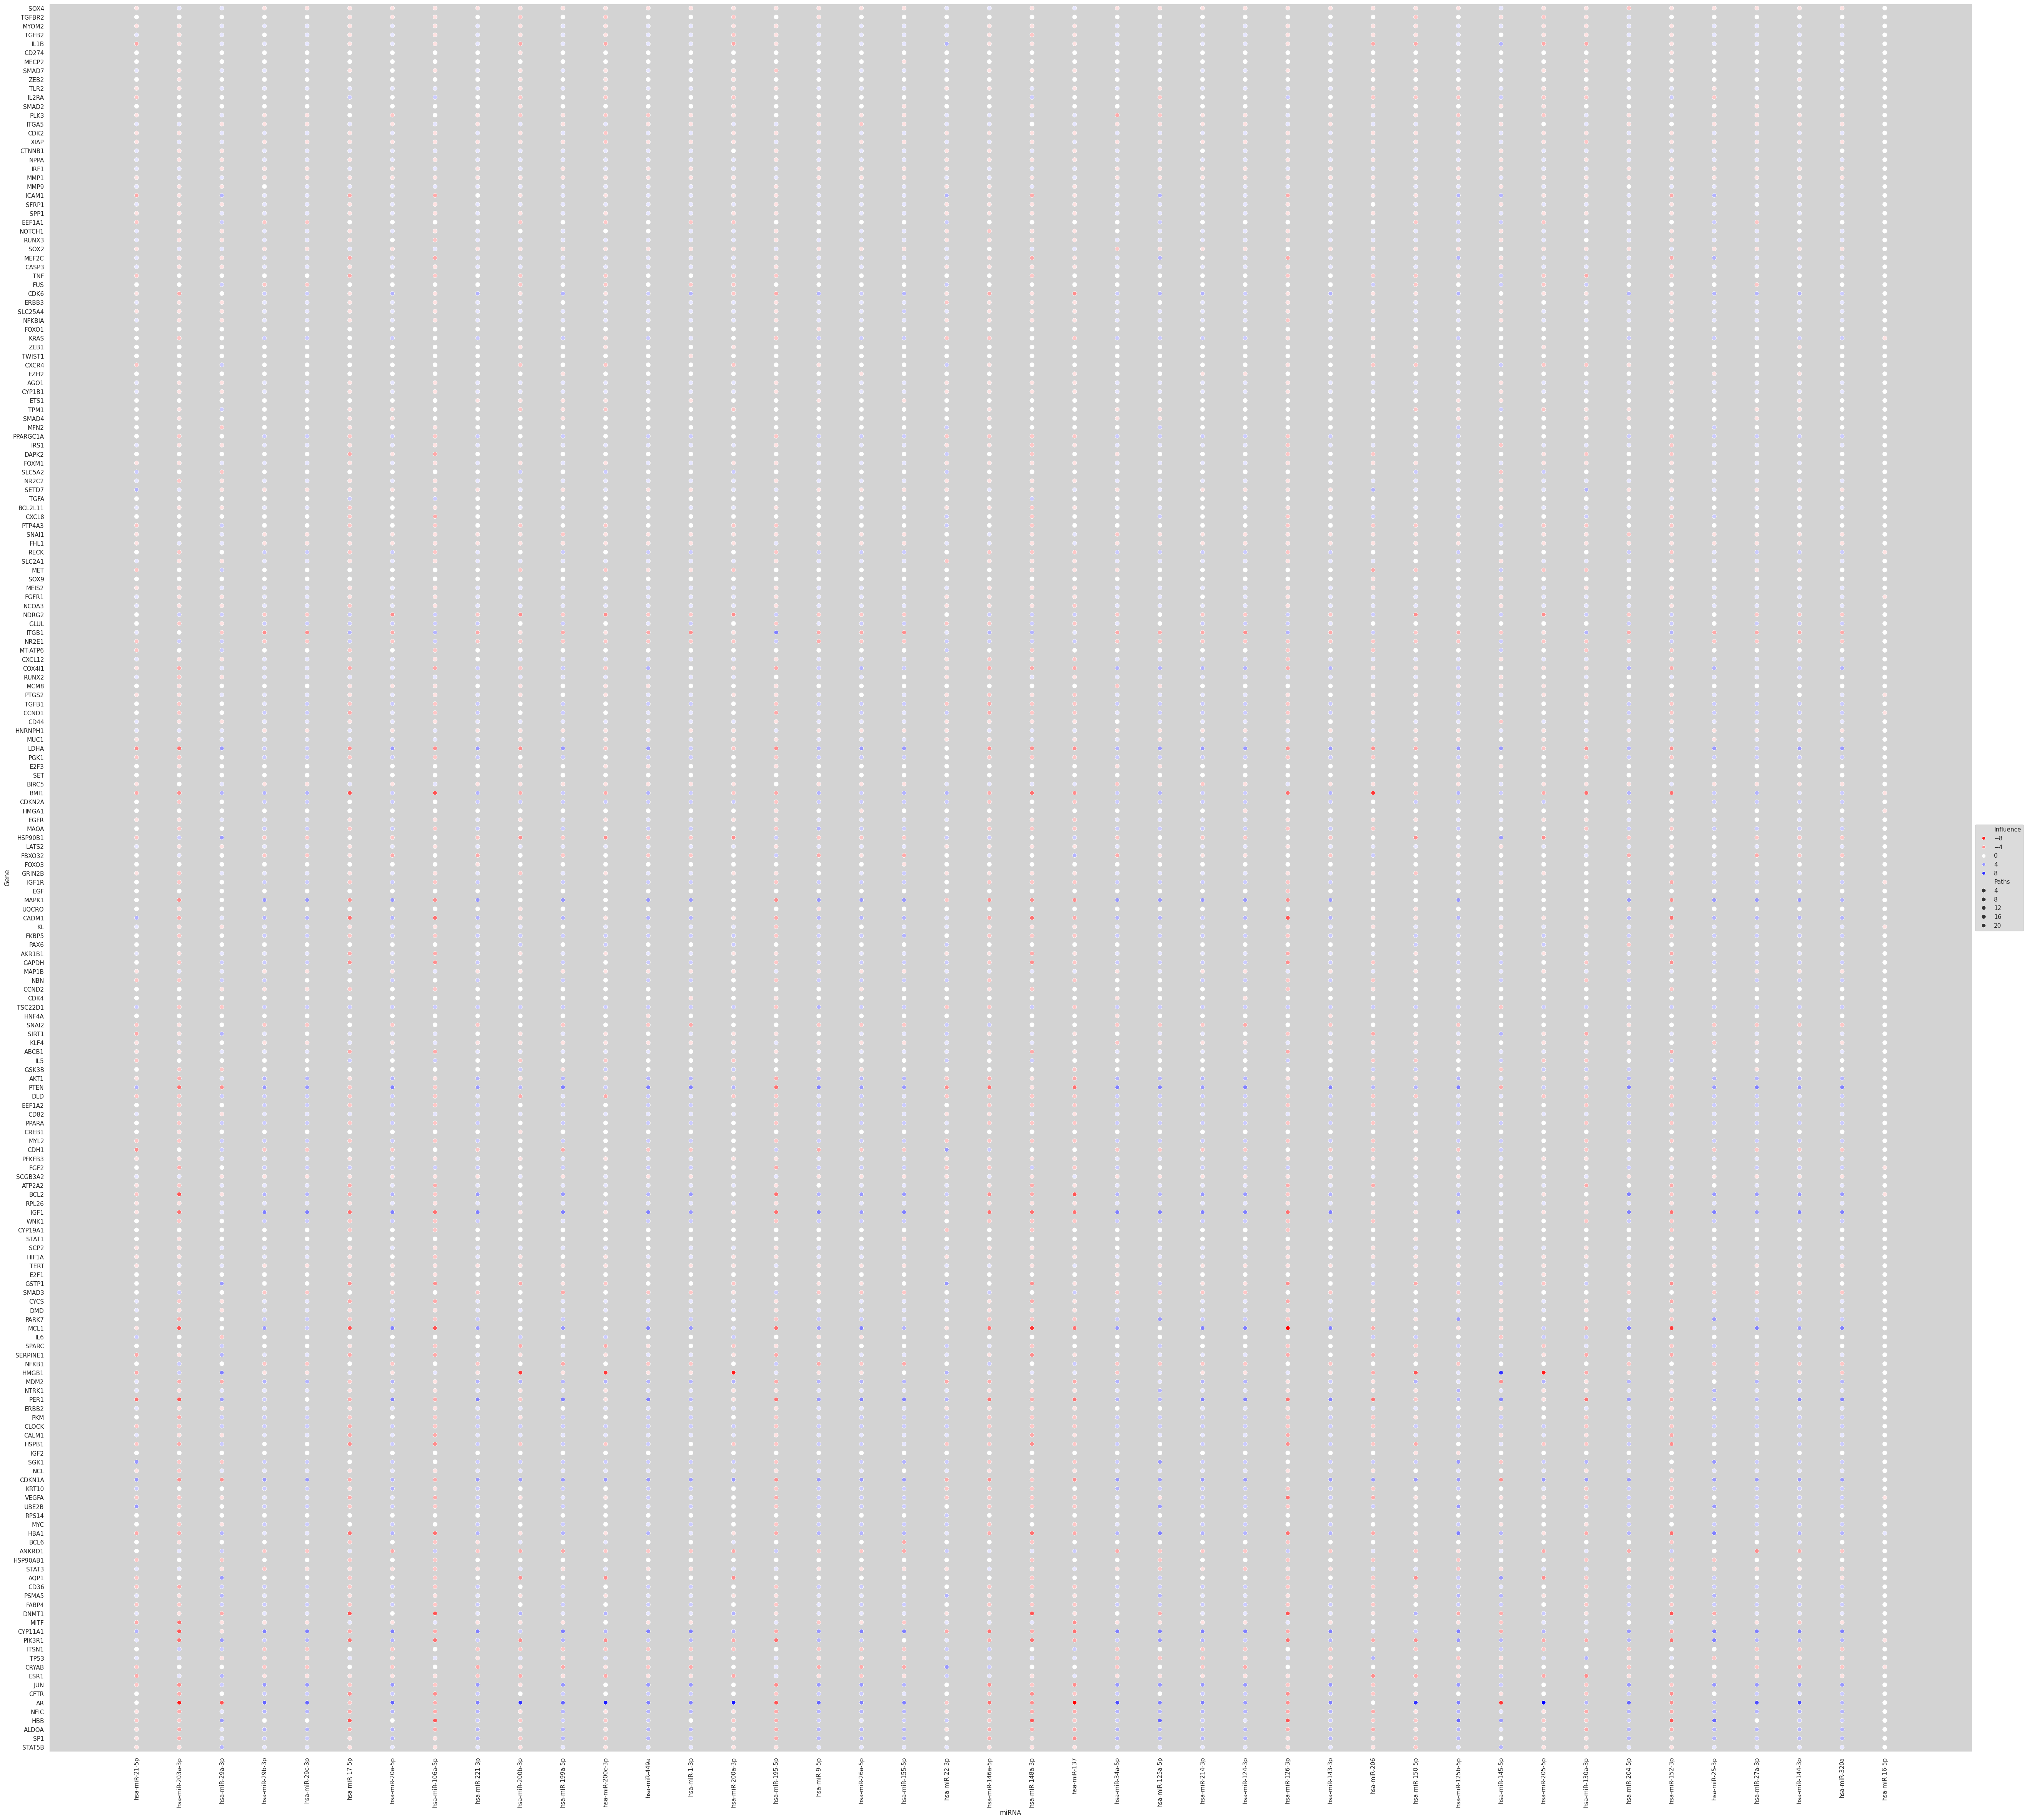

(<Figure size 6450x5900 with 1 Axes>, <Axes: xlabel='miRNA', ylabel='Gene'>)

In [12]:
influences = my_network.influence_df.T
mi_plot.plot_dotplot(influences)

This table is too big because is including everything. Let's get only the up regulated 

genes 70
mirnas 42


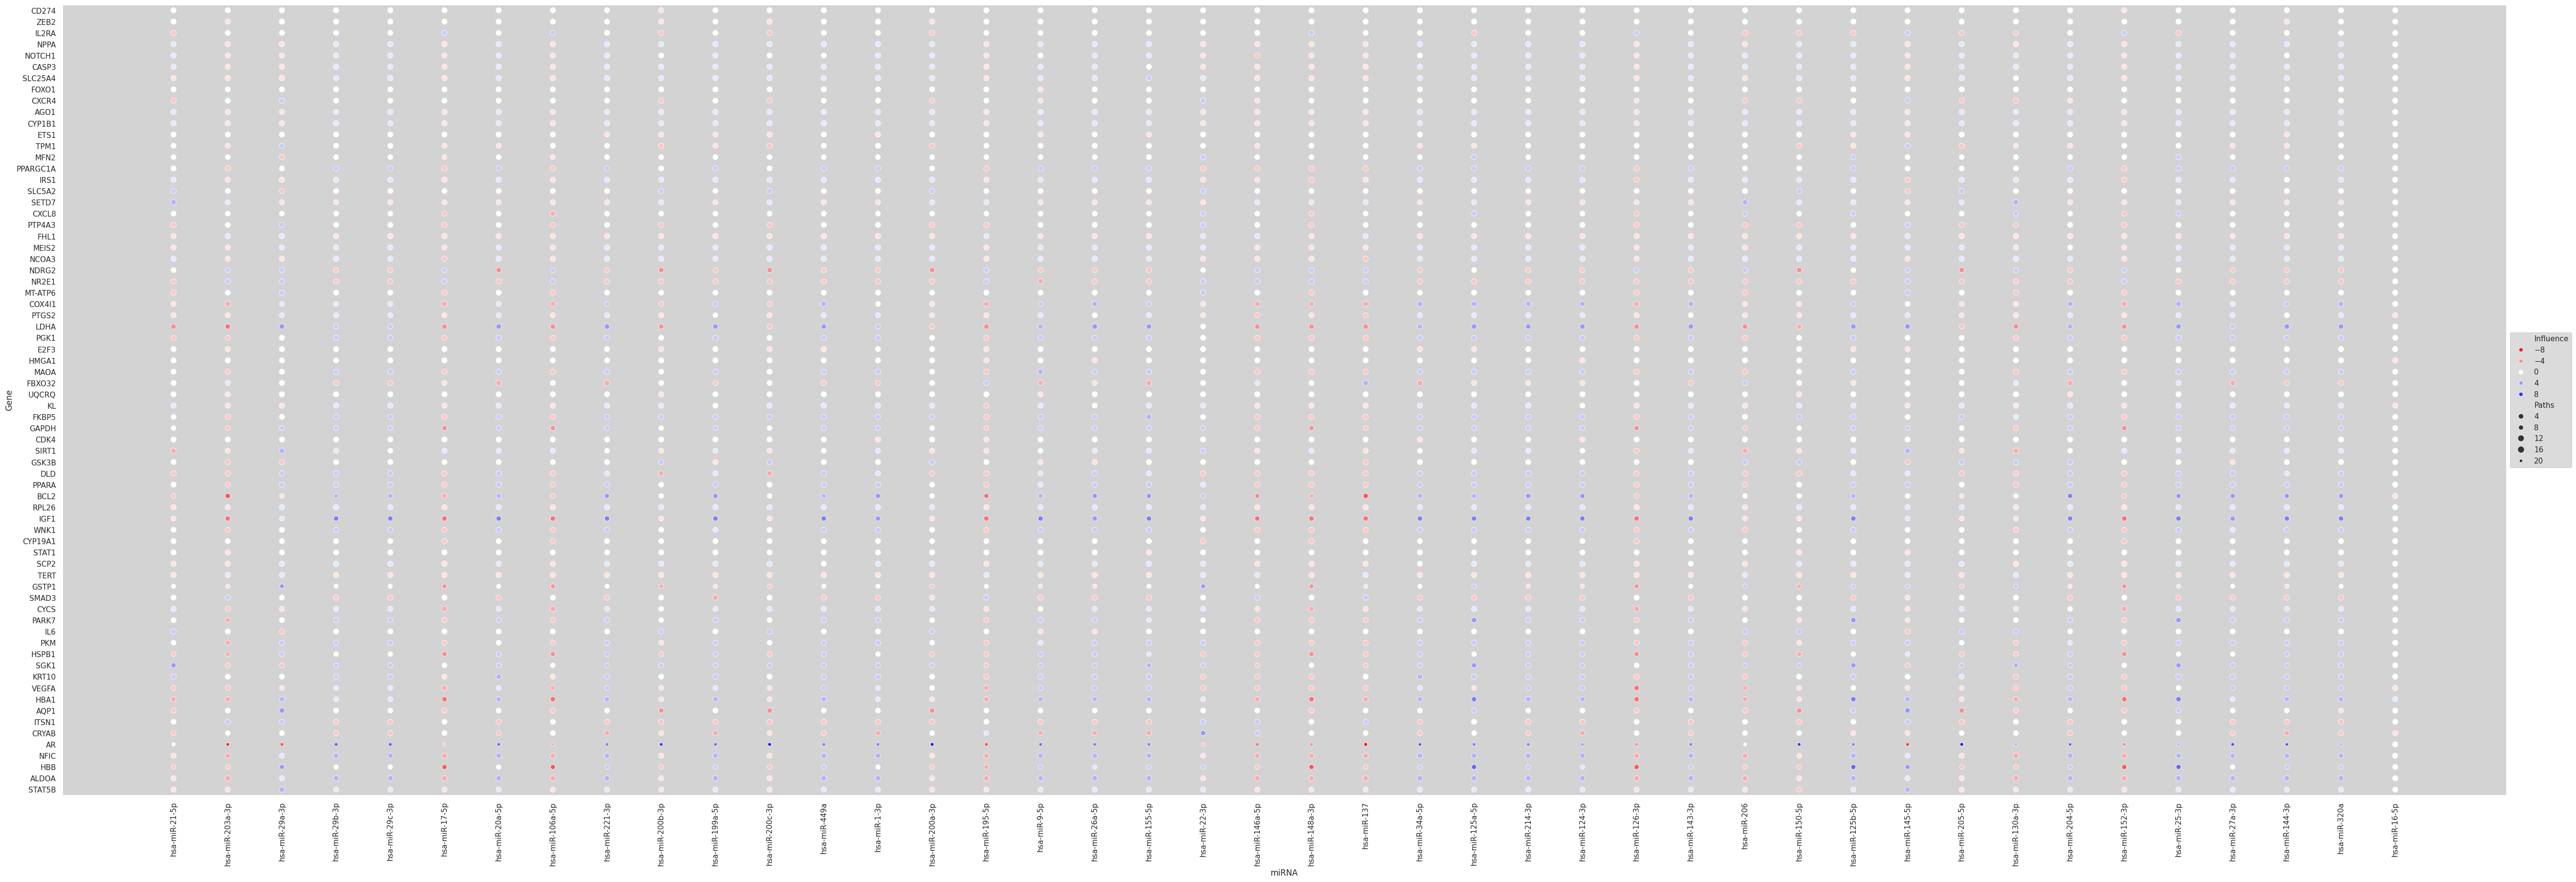

In [13]:
up_reg_yo = list(my_network.get_up_regulated('yo_file').keys())
up_reg_yo = [ g for g in up_reg_yo if g in influences.T.columns]
influences_up = influences.T[up_reg_yo].T
fig,ax = mi_plot.plot_dotplot(influences_up)

In [14]:
fig.savefig('mirna_scoring/results/dotplot_influence_up.svg')

In [15]:
up = my_network.influence_sum_df[up_reg_yo]
up['sum'] = up.sum(axis=1)

/tmp/ipykernel_10548/4212316946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up['sum'] = up.sum(axis=1)


In [16]:
up.sort_values(by=['sum'])

CD274 ZEB2 IL2RA NPPA NOTCH1 CASP3 SLC25A4 FOXO1 CXCR4 AGO1  \
hsa-miR-126-3p      0    0     2   -1     -1    -1      -1     0    -1   -1   
hsa-miR-17-5p       0    0     2   -1     -1    -1      -1     0     0   -1   
hsa-miR-152-3p     -1    0     2   -1     -1    -1      -1     0     0   -1   
hsa-miR-148a-3p     0    0     2   -1     -1    -1      -1     0     0   -1   
hsa-miR-106a-5p     0    0     2   -1     -1    -1      -1     0     0   -1   
hsa-miR-203a-3p     0   -1     0   -1     -1    -1      -1     0     0   -1   
hsa-miR-195-5p      0    0     0   -1     -1    -1      -1     0     0   -1   
hsa-miR-137         0    0     0   -1     -1    -1      -1     0     0   -1   
hsa-miR-146a-5p     0    0     0   -1     -2    -1      -1     0    -1   -1   
hsa-miR-206         0    0    -2   -1      1     1      -1     0    -2    1   
hsa-miR-130a-3p     0    0    -2   -1      1     1       0     0    -2    1   
hsa-miR-21-5p       0    0    -2    1      1     1      -1     0    -2    1   
hsa-miR-200b-3p    -1   -1    -2    1      0     1       1     0    -2    1   
hsa-miR-150-5p      0    0    -2    1      1     1       1     0    -2    1   
hsa-miR-200c-3p     0   -1    -2    1      0     1       1     0    -2    1   
hsa-miR-200a-3p     0   -1    -2    1      1     1       1     0    -2    1   
hsa-miR-205-5p      0    0    -2    1      1     1       1     0    -2    1   
hsa-miR-16-5p       0    0     0    0      0     0       0     0     0    0   
hsa-miR-22-3p       0    0     0   -1     -1    -1       1     0     2   -1   
hsa-miR-145-5p      0    0     2   -1     -1    -1      -1     0     2   -1   
hsa-miR-29a-3p      0    0     0   -1     -1    -1      -1     0     2   -1   
hsa-miR-1-3p        0    0     0    1      1     1       1     0     0    1   
hsa-miR-9-5p        0    0     0    1      0     1       1    -1    -1    1   
hsa-miR-27a-3p      0    0     0    1      1     1       1     0     0    1   
hsa-miR-29c-3p      0    0     0    1      1     1       1     0     0    1   
hsa-miR-199a-5p     0    0     0    1      1     1       1     0     0    1   
hsa-miR-29b-3p      0    0     0    1      1     1       1     0     0    1   
hsa-miR-20a-5p      0    0     0    1      1     1       1     0     0    1   
hsa-miR-144-3p      0   -1     0    1      0     1       1     0     0    1   
hsa-miR-26a-5p      0    0     0    1      1     1       1     0     0    1   
hsa-miR-124-3p      0    0     0    1      1     1       1     0     0    1   
hsa-miR-34a-5p      0    0     0    1      0     1       1     0     0    1   
hsa-miR-204-5p      0    0     0    1      1     1       1     0    -1    1   
hsa-miR-221-3p      0    0     0    1      1     1       1     0     0    1   
hsa-miR-155-5p      0    0     0    1      1     0       2     0     0    1   
hsa-miR-449a        0    0     0    1      0     1       1     0     0    1   
hsa-miR-320a        0    0     0    1      1     1       1     0     0    1   
hsa-miR-143-3p      0    0     0    1      1     1       1     0     0    1   
hsa-miR-214-3p      0    0     0    1      1     1       1     0     0    1   
hsa-miR-125b-5p     0    0    -2    1      1     1       1     0     0    1   
hsa-miR-125a-5p     0    0    -2    1      1     1       1     0     0    1   
hsa-miR-25-3p       0    0    -2    1      1     1       1     0     0    1   

                 ... HBA1 AQP1 ITSN1 CRYAB  AR NFIC HBB ALDOA STAT5B   sum  
hsa-miR-126-3p   ...   -5   -2     0     0  -4   -3  -6    -3     -1  -104  
hsa-miR-17-5p    ...   -5   -2     0     0  -2   -3  -6    -3     -1   -95  
hsa-miR-152-3p   ...   -5   -2     0     0  -4   -3  -6    -3     -1   -94  
hsa-miR-148a-3p  ...   -5   -2     0     0  -4   -3  -6    -3     -1   -94  
hsa-miR-106a-5p  ...   -5   -2     0     0  -3   -3  -6    -3     -1   -93  
hsa-miR-203a-3p  ...   -3    0     2     0  -8   -3  -2    -3     -1   -80  
hsa-miR-195-5p   ...   -3    0     0     1  -6   -3  -3    -3     -1   -74  
hs

And down regulated

genes 121
mirnas 42


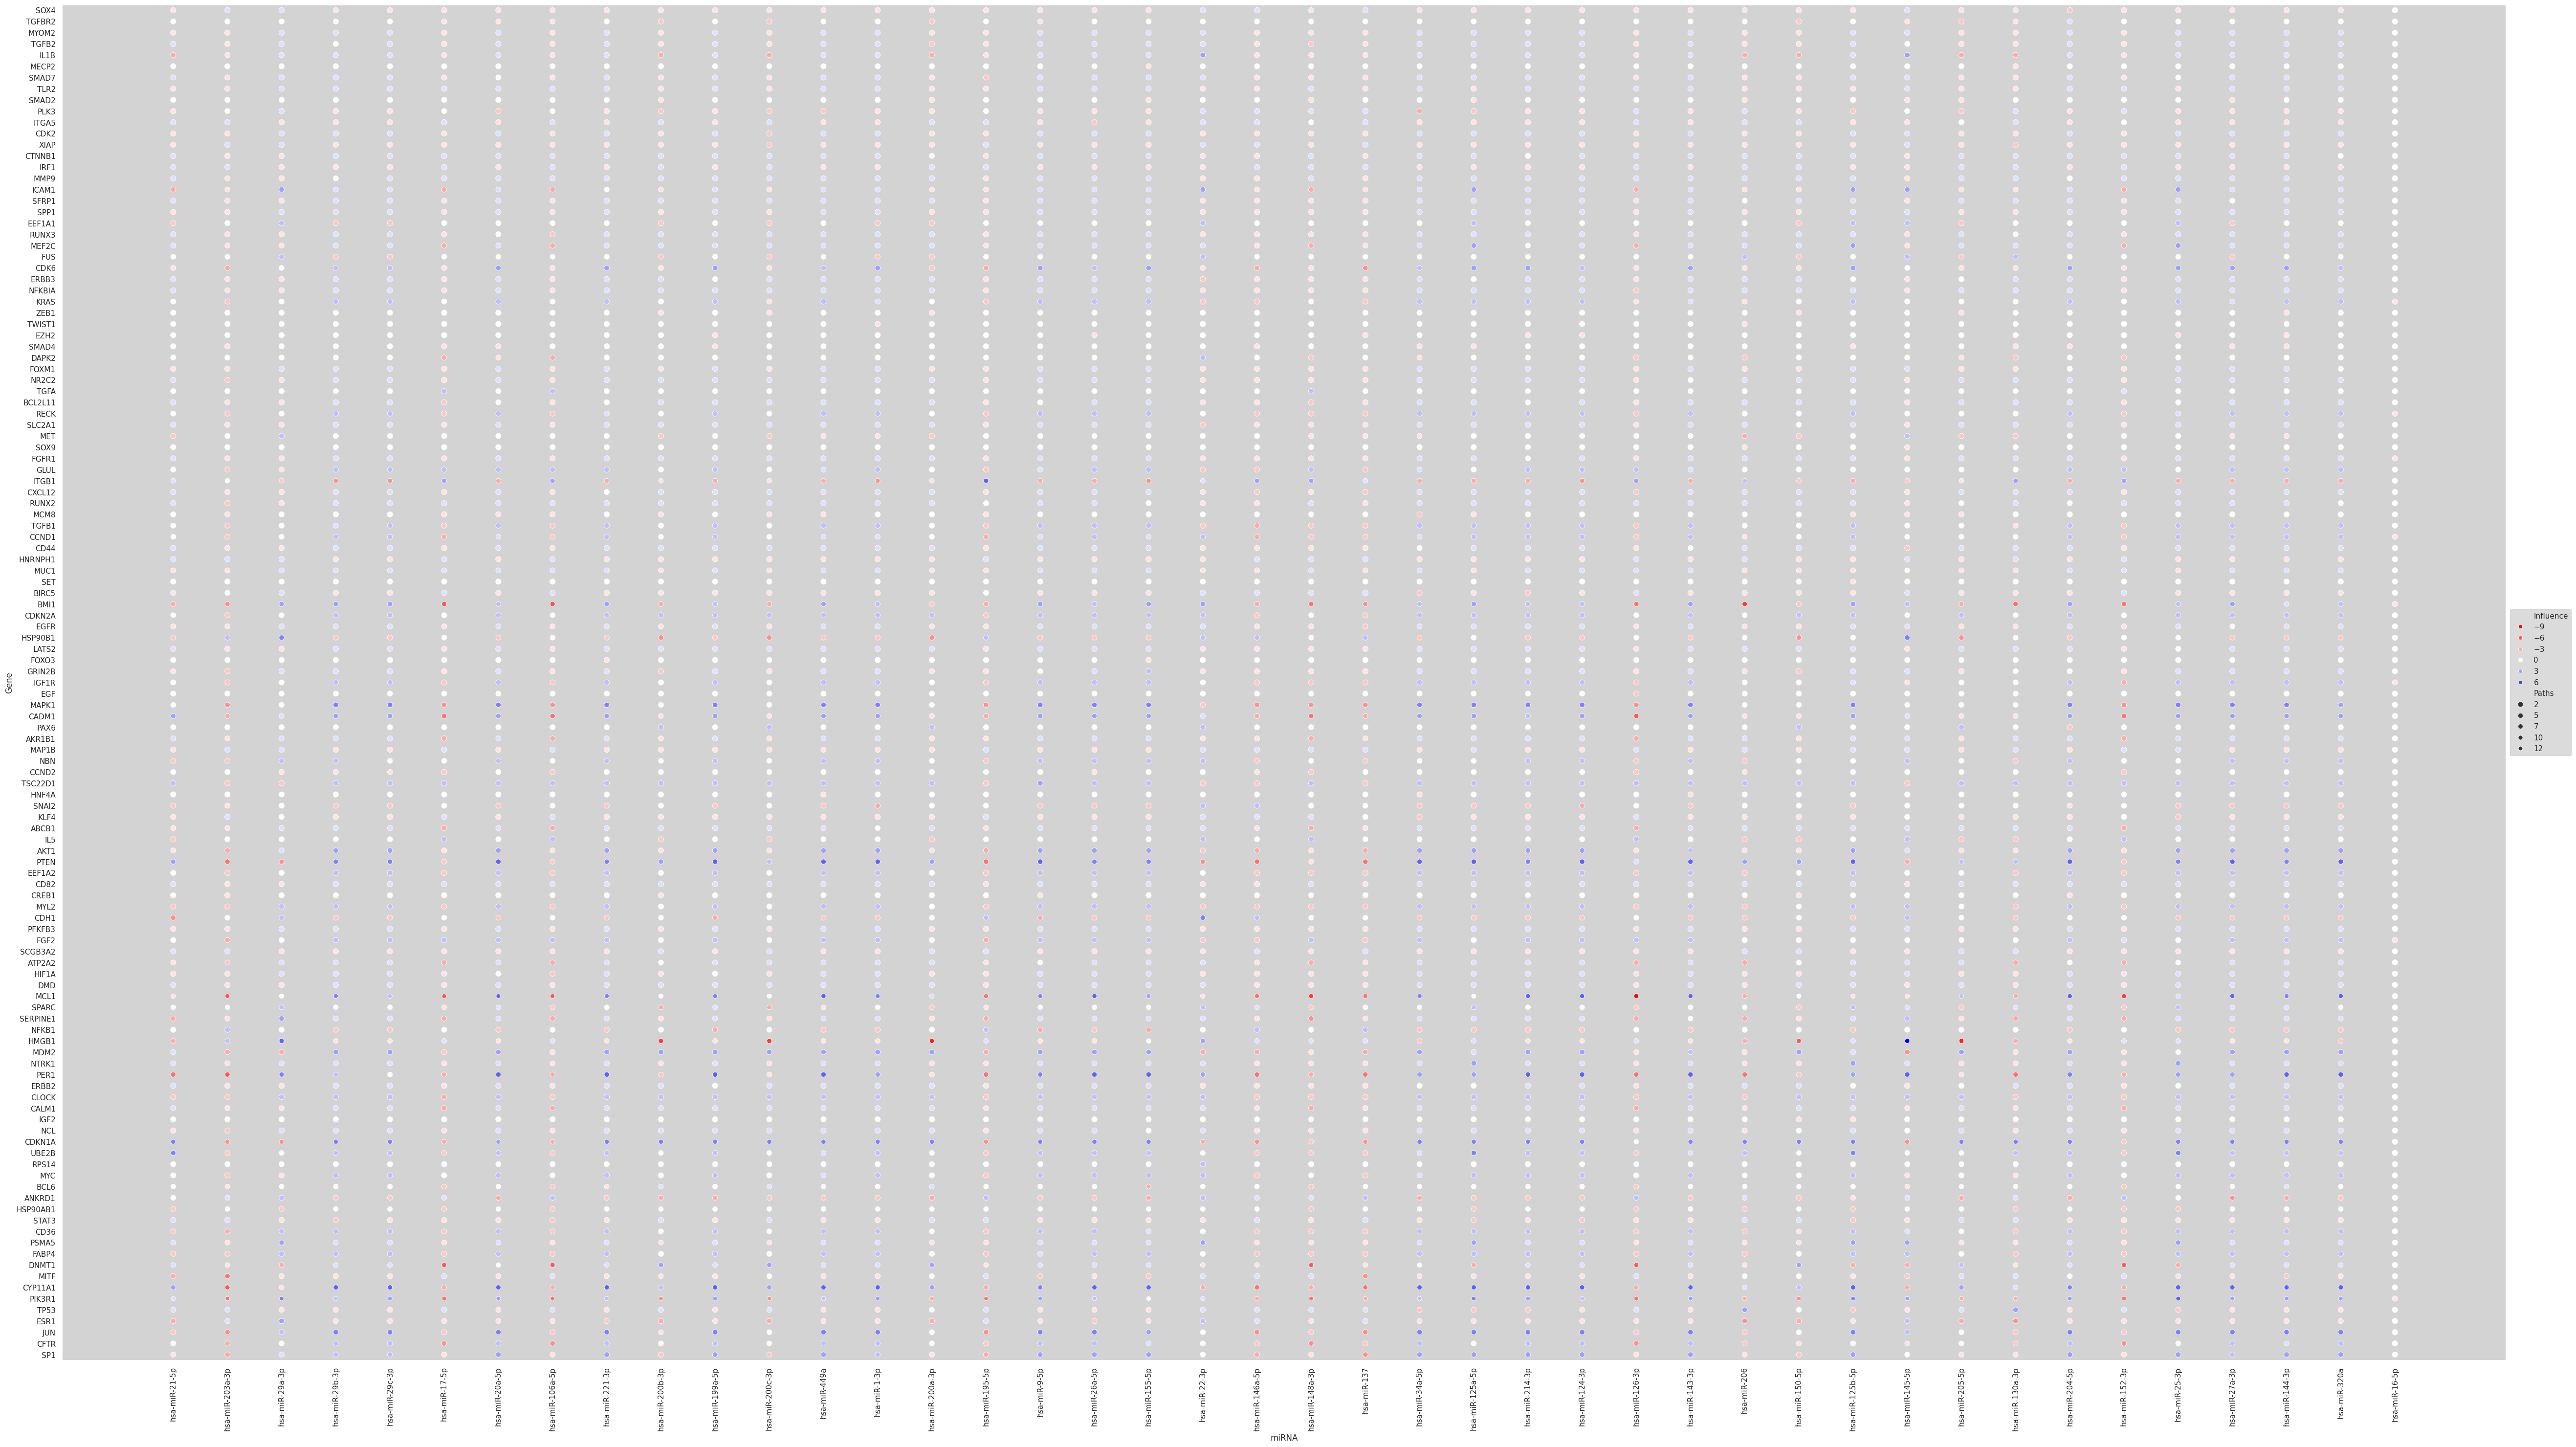

In [17]:
down_reg_yo = list(my_network.get_down_regulated('yo_file').keys())
down_reg_yo = [ g for g in down_reg_yo if g in influences.T.columns]
influences_down = influences.T[down_reg_yo].T
influences_down
fig,ax  = mi_plot.plot_dotplot(influences_down)

In [18]:
fig.savefig('mirna_scoring/results/dotplot_influence_down.svg')

In [19]:
down = my_network.influence_sum_df[down_reg_yo]
down['sum'] = up.sum(axis=1)

/tmp/ipykernel_10548/3717030698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down['sum'] = up.sum(axis=1)


In [20]:
down.sort_values(by=['sum'])

SOX4 TGFBR2 MYOM2 TGFB2 IL1B MECP2 SMAD7 TLR2 SMAD2 PLK3  ...  \
hsa-miR-126-3p    -1      0    -1    -1   -1     0    -1    1     0    1  ...   
hsa-miR-17-5p     -1     -1    -1    -1   -1     0    -1    1     0    0  ...   
hsa-miR-152-3p    -1      0    -1    -1   -1     0    -1    1     0    1  ...   
hsa-miR-148a-3p   -1      0    -1    -2   -1     0    -1    1    -1    1  ...   
hsa-miR-106a-5p   -1     -1    -1    -1   -1     0    -1    1     0    0  ...   
hsa-miR-203a-3p    1      0    -1    -1   -1     0    -1   -1     0    0  ...   
hsa-miR-195-5p    -1      0    -1    -1   -1     0    -2   -1     0    0  ...   
hsa-miR-137        1      0    -1    -1   -1     0    -1   -1     0    1  ...   
hsa-miR-146a-5p    1      0    -1    -1   -1     0    -1   -1     0    1  ...   
hsa-miR-206       -1      0    -1    -1   -3     0    -1   -1    -1    1  ...   
hsa-miR-130a-3p   -1     -1    -1    -1   -3    -1    -1   -1     0    1  ...   
hsa-miR-21-5p     -1      0    -1     1   -3     0     1   -1     0   -1  ...   
hsa-miR-200b-3p   -1     -2    -1    -1   -3     0    -1   -1    -1   -2  ...   
hsa-miR-150-5p    -1     -2    -1    -1   -3     0    -1   -1     0   -1  ...   
hsa-miR-200c-3p   -1     -2    -1    -1   -3     0    -1   -1     0   -2  ...   
hsa-miR-200a-3p   -1     -2    -1    -2   -3     0    -1   -1    -1   -1  ...   
hsa-miR-205-5p    -1     -2    -1    -1   -3     0    -1   -1    -1   -2  ...   
hsa-miR-16-5p      0      0     0     0    0     0     0    0     0    0  ...   
hsa-miR-22-3p      1      0     1     1    3     0     1   -1     0    1  ...   
hsa-miR-145-5p     1     -1     1     0    3     0     1    1    -1    0  ...   
hsa-miR-29a-3p     1      0     1     1    1     0     1    1     0    1  ...   
hsa-miR-1-3p      -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-9-5p      -1     -1     1     1    1     0     1    1     0   -1  ...   
hsa-miR-27a-3p    -1      0     1     1    1     0     1    1    -1   -1  ...   
hsa-miR-29c-3p    -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-199a-5p   -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-29b-3p    -1      0     1     0    1     0     1    1     0   -1  ...   
hsa-miR-20a-5p    -1     -1     1     1    1     0     0    1     0   -2  ...   
hsa-miR-144-3p    -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-26a-5p    -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-124-3p    -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-34a-5p    -1      0     1     1    1     0     1    1     0   -3  ...   
hsa-miR-204-5p    -2      1     1     1    1     0     1    1     0   -1  ...   
hsa-miR-221-3p    -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-155-5p    -1      0     1     1    1    -1     1    1    -1   -1  ...   
hsa-miR-449a      -1      0     1     1    1     0     1    1     0   -2  ...   
hsa-miR-320a      -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-143-3p    -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-214-3p    -1      0     1     1    1     0     1    1     0   -1  ...   
hsa-miR-125b-5p   -1      0     1     1    1     0     1   -1     0   -2  ...   
hsa-miR-125a-5p   -1      0     1     1    1     0     1   -1    -1   -2  ...   
hsa-miR-25-3p     -1      0     1     1    1     0     0   -1     0   -1  ...   

                DNMT1 MITF CYP11A1 PIK3R1 TP53 ESR1 JUN CFTR SP1   sum  
hsa-miR-126-3p     -6    1      -3     -5    1   -1  -2   -4  -1  -208  
hsa-miR-17-5p      -6    1      -3     -5    1   -1  -2   -4  -1  -190  
hsa-miR-152-3p     -6    1      -3     -5    1   -1  -2   -4  -1  -188  
hsa-miR-148a-3p    -6    1      -3     -5    1   -1  -2   -4  -1  -188  
hsa-miR-106a-5p    -6    1      -3     -5    1   -1  -2   -4  -1  -186  
hsa-miR-203a-3p    -1   -5      -6     -5    1    1  -4   -3  -3  -160  
hsa-miR-195-5p     -1

But miRNAs have many ways to reach a gene, so we can set randomWalks and check how specific pathways are affected.
For example, we are interested on pathways in:
MUSCLE
ATP
MITOCONDRIA
AUTOPHA

Then we set the key words

In [21]:
key_words=['MUSCLE','ATP']#,'MITOCONDRIA','AUTOPHAGY', 'MITOCHONDRIAL_ELECTRON', 'MYOSIN', 'OXIDATIVE_PHOSPHORYLATION', 'GOBP_SMALL_MOLECULE_METABOLIC_PROCESS']

In [22]:
mir_pathway_influence_df = my_network.get_random_walk_pathway_influence(steps=5, sample_size=10, pathway_keywords=key_words)

The result can be summarized with the different keywords and how many pathways affected contains that word. 

In [23]:
mir_pathway_influence_df.head()

MUSCLE  ATP  Different_pathways  Total
hsa-miR-21-5p         1    8                  45    202
hsa-miR-16-5p         0    0                  21     66
hsa-miR-203a-3p       1    0                  39    128
hsa-miR-29a-3p        0    0                  39    130
hsa-miR-29b-3p        0    2                  31     82

We can plot it as a heatmap

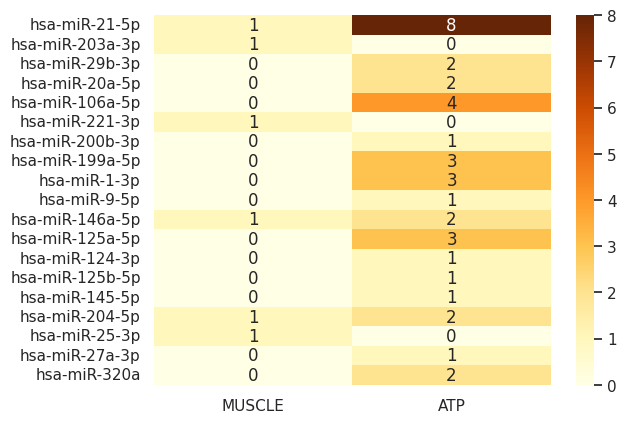

In [24]:
mi_plot.plot_pathways_keyword_heatmap(mir_pathway_influence_df)

We can see from here, that hsa-miR-106a-5p and hsa-mir-200a-3p hits a lot of ATP. This is not about the miRNA in the pathway but the genes it may affect.

In [25]:
my_network.set_all_conditions_up_down_regulated()

In [26]:
up_regulated_genes_df = pd.DataFrame(my_network.upRegulated)
down_regulated_genes_df = pd.DataFrame(my_network.downRegulated)

up_regulated_genes_df

yo_file   ym_file   mo_file  yo_F_file  yo_M_file  ym_F_file  \
CD274  0.331767  0.605969       NaN        NaN   0.292290        NaN   
ZEB2   0.402588  0.390517       NaN   0.549153   1.581021        NaN   
IL2RA  0.030109  3.624143       NaN        NaN        NaN   1.147956   
NPPA   0.430431       NaN  2.407096        NaN        NaN        NaN   
FGF23  0.253383       NaN  1.244800        NaN   1.653067        NaN   
...         ...       ...       ...        ...        ...        ...   
HNF4A       NaN       NaN       NaN        NaN        NaN        NaN   
ABCB1       NaN       NaN       NaN        NaN        NaN        NaN   
CDH1        NaN       NaN       NaN        NaN        NaN        NaN   
NRXN1       NaN       NaN       NaN        NaN        NaN        NaN   
HIF1A       NaN       NaN       NaN        NaN        NaN        NaN   

       ym_M_file  mo_F_file  mo_M_file  mf_y_file  mf_m_file  mf_o_file  
CD274   0.583380        NaN        NaN   0.742601   0.032326        NaN  
ZEB2    2.042186   1.059194        NaN   1.753181        NaN        NaN  
IL2RA   3.292859        NaN        NaN   0.099547        NaN        NaN  
NPPA         NaN   0.071962        NaN        NaN        NaN        NaN  
FGF23   0.372900   0.406582   1.256928   0.966392        NaN        NaN  
...          ...        ...        ...        ...        ...        ...  
HNF4A   0.360789        NaN        NaN        NaN        NaN        NaN  
ABCB1   1.615973        NaN        NaN   1.569571        NaN        NaN  
CDH1    1.035665        NaN        NaN   0.428443        NaN        NaN  
NRXN1   2.805694        NaN        NaN   0.221867        NaN        NaN  
HIF1A   1.398649   0.507003        NaN   0.006955        NaN        NaN  

[204 rows x 12 columns]

In [27]:
my_network.set_up_regulated_dds_score()
my_network.set_down_regulated_dds_score()

In [28]:
my_network.get_best_activator_in_comparison('yo_file')

'hsa-miR-25-3p'

In [29]:
my_network.get_best_inhibitor_in_comparison('yo_file')

'hsa-miR-203a-3p'

Going with this and checking all the best inhibitor and best activator, the results are the same. If you keep a look to the network we see a ring.
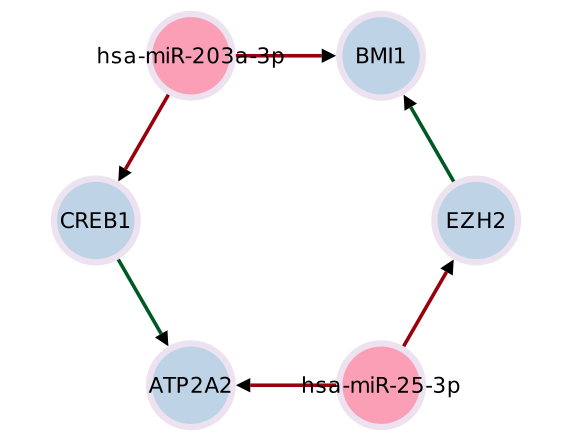

In [30]:
mir_targets = list( my_network.network.neighbors('hsa-miR-203a-3p'))

In [31]:
m_mir_targets = [g for g in mir_targets if g in up_regulated_genes_df.T.columns]
up_regulated_genes_df.T[m_mir_targets].T

yo_file   ym_file   mo_file  yo_F_file  yo_M_file  ym_F_file  \
ZEB2   0.402588  0.390517       NaN   0.549153   1.581021        NaN   
RUNX2       NaN       NaN       NaN        NaN        NaN        NaN   
SMAD4       NaN       NaN  0.362244   1.574303        NaN   1.044362   
BMI1        NaN  0.996418       NaN   1.369009   1.937672   0.827312   
BIRC5       NaN  0.778075       NaN        NaN        NaN        NaN   
E2F3   0.556649  0.369299  0.036215        NaN   0.372085        NaN   
CREB1       NaN       NaN  0.188372   1.050300        NaN   0.202279   
SNAI2       NaN  0.920492       NaN        NaN        NaN   6.377034   
NR2C2       NaN       NaN  0.099310   1.853747   0.154433   1.334994   
STAT1  0.492488       NaN  1.552108   0.298056   0.585860        NaN   
FGF2        NaN  0.206796       NaN   0.283554   0.798380        NaN   

       ym_M_file  mo_F_file  mo_M_file  mf_y_file  mf_m_file  mf_o_file  
ZEB2    2.042186   1.059194        NaN   1.753181        NaN        NaN  
RUNX2   6.372998        NaN        NaN   0.942521        NaN        NaN  
SMAD4        NaN   0.833003   1.580853        NaN   3.107089   0.932561  
BMI1    3.095254   0.775518        NaN   0.140241   0.560821   1.315837  
BIRC5   3.649208        NaN        NaN        NaN        NaN        NaN  
E2F3    0.190413        NaN   0.164312   2.367336        NaN        NaN  
CREB1        NaN   0.868470   0.587606        NaN   0.589198   1.280956  
SNAI2        NaN        NaN        NaN        NaN        NaN        NaN  
NR2C2        NaN   0.914294   1.823658        NaN   3.321918   0.548741  
STAT1   0.437853   0.892466   0.104949   0.661840        NaN   0.194685  
FGF2    1.811701   0.591283        NaN   0.187238        NaN   0.337472

In [32]:
m_mir_targets = [g for g in mir_targets if g in down_regulated_genes_df.T.columns]
down_regulated_genes_df.T[m_mir_targets].T

yo_file   ym_file   mo_file  yo_F_file  yo_M_file  ym_F_file  \
ZEB2        NaN       NaN -0.104349        NaN        NaN  -0.851004   
RUNX2 -2.090164 -0.031190 -1.569614  -2.206273  -0.155039  -1.956587   
SMAD4 -2.170774 -1.916196       NaN        NaN  -0.653484        NaN   
BMI1  -0.348529       NaN -1.321083        NaN        NaN        NaN   
BIRC5 -3.439369       NaN -3.460009  -1.293135  -0.938770  -0.628439   
E2F3        NaN       NaN       NaN  -1.187743        NaN  -0.960796   
CREB1 -1.762041 -1.455492       NaN        NaN  -1.087009        NaN   
SNAI2 -0.543261       NaN -1.390090  -1.137640        NaN        NaN   
NR2C2 -3.197786 -2.412122       NaN        NaN        NaN        NaN   
STAT1       NaN -1.110489       NaN        NaN        NaN  -0.964029   
FGF2  -0.446344       NaN -0.560943        NaN        NaN  -0.509566   

       ym_M_file  mo_F_file  mo_M_file  mf_y_file  mf_m_file  mf_o_file  
ZEB2         NaN        NaN  -0.675397        NaN  -1.913940  -2.035340  
RUNX2        NaN  -0.855601  -7.255806        NaN  -6.445366  -1.183329  
SMAD4  -2.012673        NaN        NaN  -1.081153        NaN        NaN  
BMI1         NaN        NaN  -1.487621        NaN        NaN        NaN  
BIRC5        NaN  -0.829317  -5.014596  -0.707892  -8.334737  -1.065695  
E2F3         NaN  -0.519131        NaN        NaN  -0.551979  -0.847346  
CREB1  -1.514720        NaN        NaN  -1.297824        NaN        NaN  
SNAI2        NaN  -5.283111        NaN        NaN        NaN  -0.682989  
NR2C2  -1.496909        NaN        NaN  -1.945122        NaN        NaN  
STAT1        NaN        NaN        NaN        NaN  -1.170308        NaN  
FGF2         NaN        NaN  -1.210405        NaN  -1.870651        NaN

We see that the mirna 203a marked as best inhibitors, almost does not have as target (in the network) genes that are upregulated, and if it does, are really really small stat value. On the other hand, affects a lot of down regulated genes in all the cathegories.

In [33]:
mir_targets = list( my_network.network.neighbors('hsa-miR-25-3p'))
m_mir_targets = [g for g in mir_targets if g in up_regulated_genes_df.T.columns]
up_regulated_genes_df.T[m_mir_targets].T

yo_file   ym_file  mo_file  yo_F_file  yo_M_file  ym_F_file  \
TP53         NaN  0.645814      NaN        NaN   0.613959        NaN   
MDM2         NaN       NaN      NaN   0.475594        NaN   0.534492   
PTEN         NaN  0.071171      NaN   0.187323        NaN        NaN   
EZH2         NaN  0.138763      NaN        NaN        NaN   0.369882   
SMAD7        NaN       NaN      NaN   0.739494        NaN   2.563891   
BCL2L11      NaN       NaN      NaN   0.017645        NaN   0.432722   
ATP2A2       NaN       NaN      NaN   1.414572        NaN   1.825485   
RECK         NaN       NaN      NaN        NaN        NaN        NaN   
ERBB2        NaN       NaN      NaN   1.422826        NaN   0.077117   
LATS2        NaN       NaN      NaN   0.037232        NaN   0.249257   
KLF4         NaN  0.425268      NaN        NaN        NaN        NaN   

         ym_M_file  mo_F_file  mo_M_file  mf_y_file  mf_m_file  mf_o_file  
TP53      1.986437        NaN        NaN   1.801959        NaN        NaN  
MDM2           NaN   0.113145        NaN        NaN   2.055329   1.658350  
PTEN      0.486323   0.225071        NaN        NaN        NaN        NaN  
EZH2      0.548469        NaN        NaN        NaN        NaN        NaN  
SMAD7          NaN        NaN        NaN        NaN   2.316412   0.843480  
BCL2L11   0.219978        NaN        NaN        NaN   0.384592        NaN  
ATP2A2         NaN   0.187443        NaN        NaN   1.451095   1.026711  
RECK      0.809948        NaN        NaN   0.636756        NaN        NaN  
ERBB2     1.715308   1.301039        NaN        NaN        NaN        NaN  
LATS2          NaN        NaN        NaN        NaN        NaN        NaN  
KLF4      1.222415        NaN        NaN   1.235975        NaN        NaN

In [34]:
m_mir_targets = [g for g in mir_targets if g in down_regulated_genes_df.T.columns]
down_regulated_genes_df.T[m_mir_targets].T

yo_file   ym_file   mo_file  yo_F_file  yo_M_file  ym_F_file  \
TP53    -1.046287       NaN -1.485265  -1.552714        NaN  -1.490213   
MDM2    -4.057825 -1.911991 -1.089071        NaN  -1.531914        NaN   
PTEN    -1.639309       NaN -1.332188        NaN  -0.508208  -0.074883   
EZH2    -2.008675       NaN -1.686882  -0.298525  -0.953392        NaN   
SMAD7   -3.767433 -0.366099 -2.501422        NaN        NaN        NaN   
BCL2L11 -1.895344 -0.225165 -1.215081        NaN  -0.061084        NaN   
ATP2A2  -1.815019 -0.974687 -0.360766        NaN  -3.464524        NaN   
RECK    -2.052701 -0.906563 -0.615057  -1.811749  -1.242934  -1.781233   
ERBB2   -2.224998 -0.074448 -1.627243        NaN  -0.262472        NaN   
LATS2   -0.014904 -0.002278 -0.009019        NaN        NaN        NaN   
KLF4    -1.463200       NaN -1.571667  -1.559674  -0.467748  -0.509477   

         ym_M_file  mo_F_file  mo_M_file  mf_y_file  mf_m_file  mf_o_file  
TP53           NaN  -0.530540  -1.591614        NaN  -1.736396  -1.036937  
MDM2     -0.522992        NaN  -0.967174  -1.263383        NaN        NaN  
PTEN           NaN        NaN  -1.055843  -0.556416  -2.040070  -0.921040  
EZH2           NaN  -0.517140  -1.575435  -0.942095  -1.985749  -0.851926  
SMAD7          NaN  -0.920002        NaN        NaN        NaN        NaN  
BCL2L11        NaN  -0.256938  -0.306831  -0.107306        NaN  -0.786513  
ATP2A2   -3.112984        NaN  -0.037250  -3.937322        NaN        NaN  
RECK           NaN  -0.592226  -2.159611        NaN  -1.385890  -1.203002  
ERBB2          NaN        NaN  -2.176230  -0.463191  -1.709402  -0.412530  
LATS2          NaN  -0.122323        NaN        NaN  -0.176877  -0.290026  
KLF4           NaN  -1.157415  -1.834856        NaN  -0.518168  -0.828670

The best activator, mir-25, does not touch any upregulated in yo, only downregulared genes, the activation of this mirna is indirect. That is not as easy to see than the inhibition champion. But now we can look at the mirna paths!

In [35]:
paths_mir = my_network.mirnas_paths['hsa-miR-25-3p']
paths_mir

[['hsa-miR-25-3p', 'ATP2A2'],
 ['hsa-miR-25-3p', 'TP53', 'SPARC'],
 ['hsa-miR-25-3p', 'KLF4', 'HSP90AB1'],
 ['hsa-miR-25-3p', 'PTEN'],
 ['hsa-miR-25-3p', 'KLF4', 'HMGB1', 'TNF'],
 ['hsa-miR-25-3p', 'TP53', 'MCL1'],
 ['hsa-miR-25-3p', 'ERBB2'],
 ['hsa-miR-25-3p', 'KLF4', 'CYP11A1']]

In [36]:
targets = list(set([str(x) for x in np.concatenate(paths_mir)]))

in cytoscape, we can check the targets

In [37]:
affected_25 = list(up.loc['hsa-miR-25-3p'][abs(up.loc['hsa-miR-25-3p'])>0].index)

In [38]:
affected_25.extend(down.loc['hsa-miR-25-3p'][abs(down.loc['hsa-miR-25-3p'])>0].index)

In [39]:
import mirna_scoring.jupyter_functions as jf
jf.get_cytoscape_filter_from_list(targets)

'(KLF4)|(PTEN)|(SPARC)|(TP53)|(hsa-miR-25-3p)|(MCL1)|(CYP11A1)|(ATP2A2)|(TNF)|(ERBB2)|(HMGB1)|(HSP90AB1)|'

In [40]:
jf.get_cytoscape_filter_from_list(affected_25)

'(IL2RA)|(NPPA)|(NOTCH1)|(CASP3)|(SLC25A4)|(AGO1)|(CYP1B1)|(MFN2)|(PPARGC1A)|(IRS1)|(SETD7)|(CXCL8)|(FHL1)|(MEIS2)|(NCOA3)|(NR2E1)|(COX4I1)|(PTGS2)|(LDHA)|(PGK1)|(MAOA)|(FBXO32)|(KL)|(FKBP5)|(GAPDH)|(SIRT1)|(DLD)|(PPARA)|(BCL2)|(RPL26)|(IGF1)|(WNK1)|(SCP2)|(TERT)|(GSTP1)|(SMAD3)|(CYCS)|(PARK7)|(PKM)|(SGK1)|(KRT10)|(HBA1)|(AQP1)|(AR)|(NFIC)|(HBB)|(ALDOA)|(STAT5B)|(sum)|(SOX4)|(MYOM2)|(TGFB2)|(IL1B)|(TLR2)|(PLK3)|(ITGA5)|(CDK2)|(XIAP)|(CTNNB1)|(IRF1)|(MMP9)|(ICAM1)|(SFRP1)|(SPP1)|(EEF1A1)|(RUNX3)|(MEF2C)|(CDK6)|(ERBB3)|(NFKBIA)|(KRAS)|(EZH2)|(FOXM1)|(NR2C2)|(RECK)|(SLC2A1)|(FGFR1)|(ITGB1)|(CXCL12)|(RUNX2)|(TGFB1)|(CCND1)|(CD44)|(HNRNPH1)|(MUC1)|(BIRC5)|(BMI1)|(CDKN2A)|(EGFR)|(GRIN2B)|(IGF1R)|(MAPK1)|(CADM1)|(AKR1B1)|(MAP1B)|(TSC22D1)|(SNAI2)|(KLF4)|(ABCB1)|(AKT1)|(PTEN)|(EEF1A2)|(CD82)|(MYL2)|(CDH1)|(PFKFB3)|(SCGB3A2)|(HIF1A)|(DMD)|(MCL1)|(SPARC)|(SERPINE1)|(NFKB1)|(HMGB1)|(NTRK1)|(PER1)|(CLOCK)|(CALM1)|(NCL)|(CDKN1A)|(UBE2B)|(MYC)|(HSP90AB1)|(STAT3)|(CD36)|(PSMA5)|(FABP4)|(DNMT1)|(MITF)

We have a lot of mirnas, but some of them behave similarly. We can see that the mirnas cluster in ... around 5 clusters.

In [42]:
# Create a DataFrame for the distance matrix
dist_df = my_network.get_mirnas_similarity()

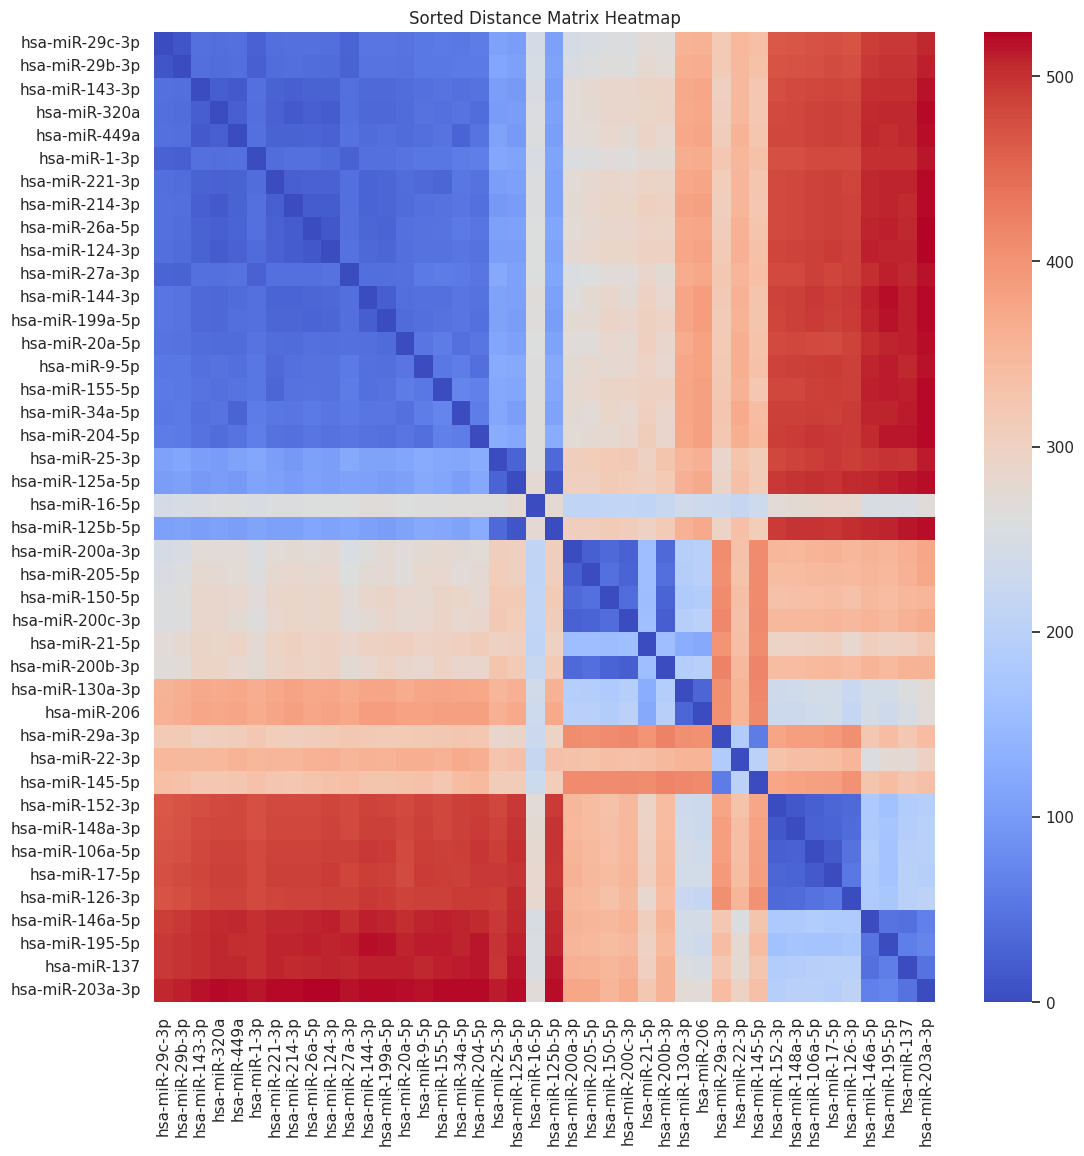

In [43]:
mi_plot.plot_mirnas_similarirty(dist_df)

We can see the cluster they belong if we do 5 clusters. We can also change the cluster numbers

In [51]:
mirna_clusters = jf.cluster_mirnas(dist_matrix_square=dist_df, n_clusters=5)
mirna_clusters.sort_values(by=["Cluster"]).head()

Cluster labels:
 [0 2 1 0 0 4 0 4 0 3 0 3 0 0 3 2 0 0 0 0 2 4 2 0 0 0 0 4 0 0 3 0 1 3 0 0 4
 0 0 0 0 0]


/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Cluster
hsa-miR-21-5p         0
hsa-miR-29b-3p        0
hsa-miR-20a-5p        0
hsa-miR-29c-3p        0
hsa-miR-449a          0

Ok, then, we need to put a number to the mirnas. They are stored as minna_

In [52]:
my_network.set_measurements()

In [56]:
my_network.mirnas_influences.keys()

dict_keys(['pathways', 'activators', 'inhibitors'])

In [65]:
my_network.mirnas_influences['pathways'].sort_values(by='participation', ascending=False)

MUSCLE  ATP  Different_pathways  Total  participation
hsa-miR-21-5p         1    8                  45    202              9
hsa-miR-106a-5p       0    4                  57    232              4
hsa-miR-146a-5p       1    2                  21     50              3
hsa-miR-125a-5p       0    3                  53    274              3
hsa-miR-1-3p          0    3                  58    220              3
hsa-miR-204-5p        1    2                  51    140              3
hsa-miR-199a-5p       0    3                  55    226              3
hsa-miR-20a-5p        0    2                  42    194              2
hsa-miR-320a          0    2                  64    190              2
hsa-miR-29b-3p        0    2                  31     82              2
hsa-miR-145-5p        0    1                  36    124              1
hsa-miR-125b-5p       0    1                  44    148              1
hsa-miR-25-3p         1    0                  48    180              1
hsa-miR-27a-3p        0    1                  32     96              1
hsa-miR-203a-3p       1    0                  39    128              1
hsa-miR-221-3p        1    0                  37    164              1
hsa-miR-9-5p          0    1                  57    176              1
hsa-miR-200b-3p       0    1                  53    170              1
hsa-miR-124-3p        0    1                  42    174              1
hsa-miR-29c-3p        0    0                  29    124              0
hsa-miR-29a-3p        0    0                  39    130              0
hsa-miR-16-5p         0    0                  21     66              0
hsa-miR-17-5p         0    0                  20     62              0
hsa-miR-195-5p        0    0                  23     66              0
hsa-miR-449a          0    0                  21     68              0
hsa-miR-200c-3p       0    0                  30     90              0
hsa-miR-34a-5p        0    0                  37    166              0
hsa-miR-137           0    0                  20     72              0
hsa-miR-148a-3p       0    0                  34    110              0
hsa-miR-22-3p         0    0                  31    102              0
hsa-miR-26a-5p        0    0                  26     82              0
hsa-miR-155-5p        0    0                  35    120              0
hsa-miR-200a-3p       0    0                  47    178              0
hsa-miR-214-3p        0    0                  38    152              0
hsa-miR-206           0    0                  24     76              0
hsa-miR-150-5p        0    0                  37    148              0
hsa-miR-126-3p        0    0                  21     68              0
hsa-miR-143-3p        0    0                  20     64              0
hsa-miR-152-3p        0    0                  23     66              0
hsa-miR-130a-3p       0    0                  49    160              0
hsa-miR-205-5p        0    0                  25     66              0
hsa-miR-144-3p        0    0                  31     96              0